## Random Forest - Regression

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (9,5)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [16]:
df=pd.read_csv("car_dataset.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.350,5.590,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.750,9.540,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.250,9.850,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.850,4.150,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.600,6.870,42450,Diesel,Dealer,Manual,0


In [17]:
df.shape

(301, 9)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [19]:
df.isnull().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.000,2013.628,2.892,2003.000,2012.000,2014.000,2016.000,2018.000
Selling_Price,301.000,4.661,5.083,0.100,0.900,3.600,6.000,35.000
Present_Price,301.000,7.628,8.644,0.320,1.200,6.400,9.900,92.600
Kms_Driven,301.000,36947.206,38886.884,500.000,15000.000,32000.000,48767.000,500000.000
Owner,301.000,0.043,0.248,0.000,0.000,0.000,0.000,3.000


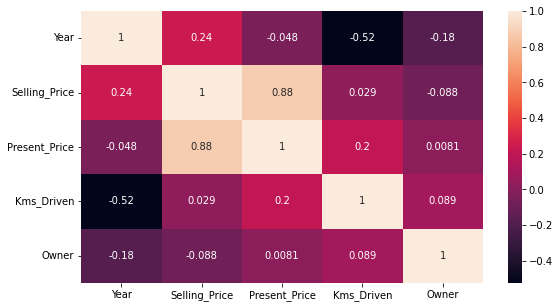

In [21]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [22]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.350,5.590,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.750,9.540,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.250,9.850,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.850,4.150,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.600,6.870,42450,Diesel,Dealer,Manual,0


In [23]:
df["vehicle_age"]=2021-df.Year

In [24]:
df.Car_Name.value_counts()

city                         26
corolla altis                16
verna                        14
fortuner                     11
brio                         10
ciaz                          9
innova                        9
i20                           9
grand i10                     8
jazz                          7
amaze                         7
Royal Enfield Classic 350     7
ertiga                        6
eon                           6
sx4                           6
alto k10                      5
i10                           5
swift                         5
Bajaj Pulsar 150              4
Royal Enfield Thunder 350     4
ritz                          4
wagon r                       4
etios liva                    4
dzire                         4
xcent                         3
etios cross                   3
Royal Enfield Thunder 500     3
TVS Apache RTR 160            3
Yamaha FZ S V 2.0             3
creta                         3
Honda CB Hornet 160R          3
etios g 

In [25]:
df.drop(columns=["Year"], inplace=True)

In [26]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,ritz,3.350,5.590,27000,Petrol,Dealer,Manual,0,7
1,sx4,4.750,9.540,43000,Diesel,Dealer,Manual,0,8
2,ciaz,7.250,9.850,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2.850,4.150,5200,Petrol,Dealer,Manual,0,10
4,swift,4.600,6.870,42450,Diesel,Dealer,Manual,0,7


## Train test split

In [27]:
from sklearn.preprocessing import OrdinalEncoder

In [28]:
X=df.drop("Selling_Price", axis=1)
y=df.Selling_Price

In [29]:
cat = X.select_dtypes("object").columns
cat

Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [30]:
X[cat].head()

,Car_Name,Fuel_Type,Seller_Type,Transmission
0,ritz,Petrol,Dealer,Manual
1,sx4,Diesel,Dealer,Manual
2,ciaz,Petrol,Dealer,Manual
3,wagon r,Petrol,Dealer,Manual
4,swift,Diesel,Dealer,Manual


In [31]:
enc = OrdinalEncoder()
X[cat] = enc.fit_transform(X[cat])
X.head()

,Car_Name,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,90.000,5.590,27000,2.000,0.000,1.000,0,7
1,93.000,9.540,43000,1.000,0.000,1.000,0,8
2,68.000,9.850,6900,2.000,0.000,1.000,0,4
3,96.000,4.150,5200,2.000,0.000,1.000,0,10
4,92.000,6.870,42450,1.000,0.000,1.000,0,7


In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=5)

print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)


Train features shape :  (240, 8)
Train target shape   :  (240,)
Test features shape  :  (61, 8)
Test target shape    :  (61,)


## Modeling for Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [34]:
DT_model = DecisionTreeRegressor(random_state=101)

In [35]:
DT_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=101)

In [36]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [37]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [38]:
train_val(DT_model, X_train, y_train, X_test, y_test)

,train,test
R2,1.000,0.952
mae,0.000,0.603
mse,0.000,1.283
rmse,0.000,1.133


In [39]:
from sklearn.model_selection import cross_validate, cross_val_score
model = DecisionTreeRegressor(random_state=101)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_r2                             0.891
test_neg_mean_absolute_error       -0.787
test_neg_mean_squared_error        -2.748
test_neg_root_mean_squared_error   -1.457
dtype: float64

## Feature Importances

In [40]:
DT_model.feature_importances_

array([9.18365194e-03, 8.94444598e-01, 4.78756069e-03, 7.75109283e-04,
       2.82862694e-04, 7.56380773e-04, 3.41291861e-05, 8.97357073e-02])

In [41]:
df_f_i = pd.DataFrame(index=X.columns, data = DT_model.feature_importances_, 
                      columns = ["Feature Importance"]).sort_values("Feature Importance")
df_f_i

,Feature Importance
Owner,0.000
Seller_Type,0.000
Transmission,0.001
Fuel_Type,0.001
Kms_Driven,0.005
Car_Name,0.009
vehicle_age,0.090
Present_Price,0.894


Feature Importance
Owner	0.000000
Seller_Type_Individual	0.000104
Fuel_Type_Diesel	0.000616
Fuel_Type_Petrol	0.001590
Transmission_Manual	0.001806
Kms_Driven	0.017682
vehicle_age	0.081051
Present_Price	0.897153

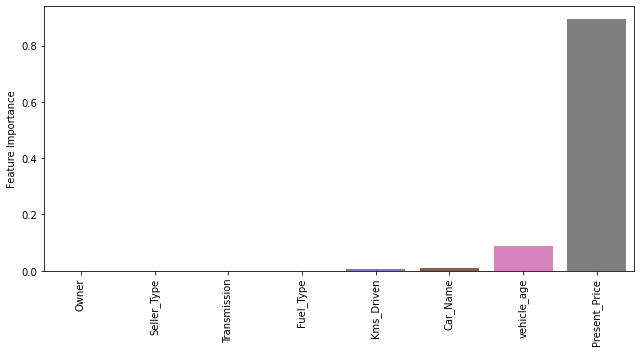

In [42]:
sns.barplot(x = df_f_i.index, y = 'Feature Importance', data = df_f_i)
plt.xticks(rotation = 90)
plt.tight_layout()

## Modeling for Random Forest

In [43]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
rf_model = RandomForestRegressor(random_state=101)
rf_model.fit(X_train,y_train)
train_val(rf_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.986,0.973
mae,0.235,0.513
mse,0.348,0.725
rmse,0.590,0.851


In [45]:
from sklearn.model_selection import cross_validate, cross_val_score
model = RandomForestRegressor(random_state=101)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_r2                             0.862
test_neg_mean_absolute_error       -0.736
test_neg_mean_squared_error        -3.393
test_neg_root_mean_squared_error   -1.566
dtype: float64

## Feature Importances

In [46]:
rf_model.feature_importances_

array([2.34156850e-02, 8.66318271e-01, 1.73148579e-02, 2.14160300e-03,
       2.08393371e-03, 2.67174857e-03, 6.16411815e-05, 8.59922594e-02])

In [47]:
df_f_i = pd.DataFrame(index=X.columns, data = rf_model.feature_importances_, 
                      columns = ["Feature Importance"]).sort_values("Feature Importance")
df_f_i

,Feature Importance
Owner,0.000
Seller_Type,0.002
Fuel_Type,0.002
Transmission,0.003
Kms_Driven,0.017
Car_Name,0.023
vehicle_age,0.086
Present_Price,0.866


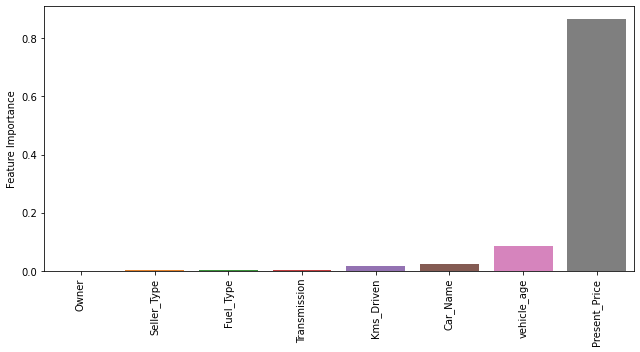

In [48]:
sns.barplot(x = df_f_i.index, y = 'Feature Importance', data = df_f_i)
plt.xticks(rotation = 90)
plt.tight_layout()

## Visualizing trees

In [49]:
from sklearn.tree import plot_tree

def report_model(model):
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    print('\n')
    print(train_val(model, X_train, y_train, X_test, y_test))
    print('\n')
    plt.figure(figsize=(12,8),dpi=100)
    plot_tree(model.estimators_[2],filled=True, feature_names=X.columns, fontsize=10);

In [50]:
pruned_tree = RandomForestRegressor(n_estimators=250, max_depth=4, random_state=101)
pruned_tree.fit(X_train,y_train)

RandomForestRegressor(max_depth=4, n_estimators=250, random_state=101)



      train  test
R2    0.963 0.941
mae   0.572 0.750
mse   0.953 1.577
rmse  0.976 1.256




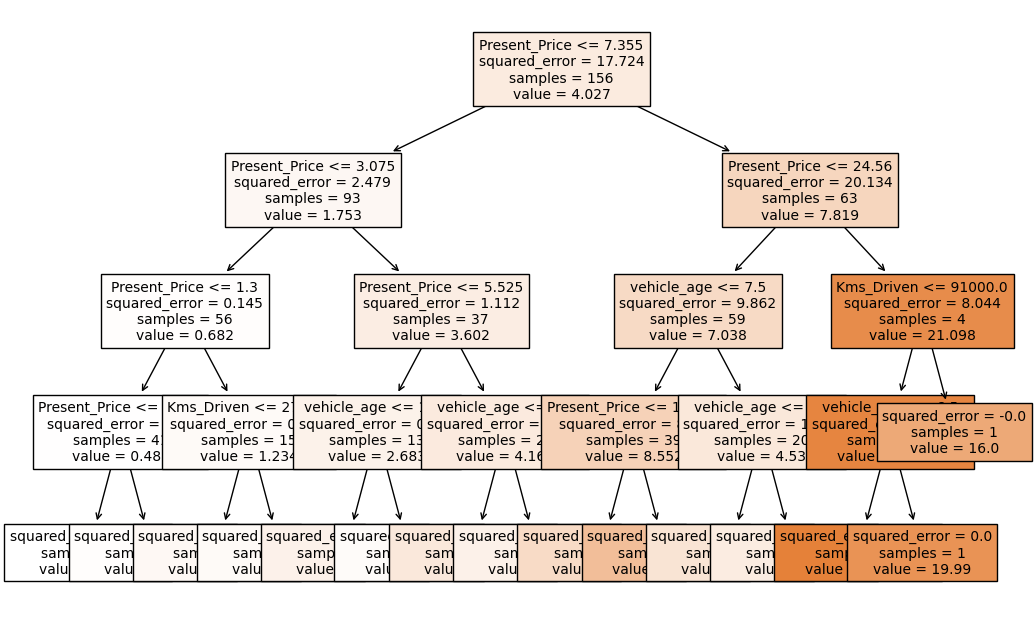

In [51]:
report_model(pruned_tree)

## GridSearch

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
model = RandomForestRegressor(random_state=101)

In [54]:
param_grid = {"n_estimators":[200, 500],
              "max_depth": [None, 4, 5, 6, 7,8],
              "min_samples_leaf": [1, 2, 3, 4],
              "min_samples_split": [2, 3, 5, 6],
              "max_features":['auto', X.shape[1]/3, 2, 4]}

In [55]:

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [ ]:
grid_model.fit(X_train,y_train)

In [ ]:
grid_model.best_estimator_

In [ ]:
grid_model.best_params_

In [ ]:
grid_score =pd.DataFrame(grid_model.cv_results_)
grid_score

In [ ]:
grid_model.best_index_

In [ ]:
grid_model.best_score_

In [ ]:
train_val(grid_model, X_train, y_train, X_test, y_test)

In [ ]:
from sklearn.model_selection import cross_validate, cross_val_score

model = RandomForestRegressor(random_state=101, max_depth = None,
             max_features= 4,
             min_samples_leaf = 1,
             min_samples_split= 2,
             n_estimators= 200)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv = 10)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

In [ ]:
y_pred = grid_model.predict(X_test)
my_dict = { 'Actual': y_test, 'Pred': y_pred, 'Residual': y_test-y_pred }
compare = pd.DataFrame(my_dict)

In [ ]:
comp_sample = compare.sample(20)
comp_sample

In [ ]:
comp_sample.plot(kind='bar',figsize=(15,9))
plt.show()